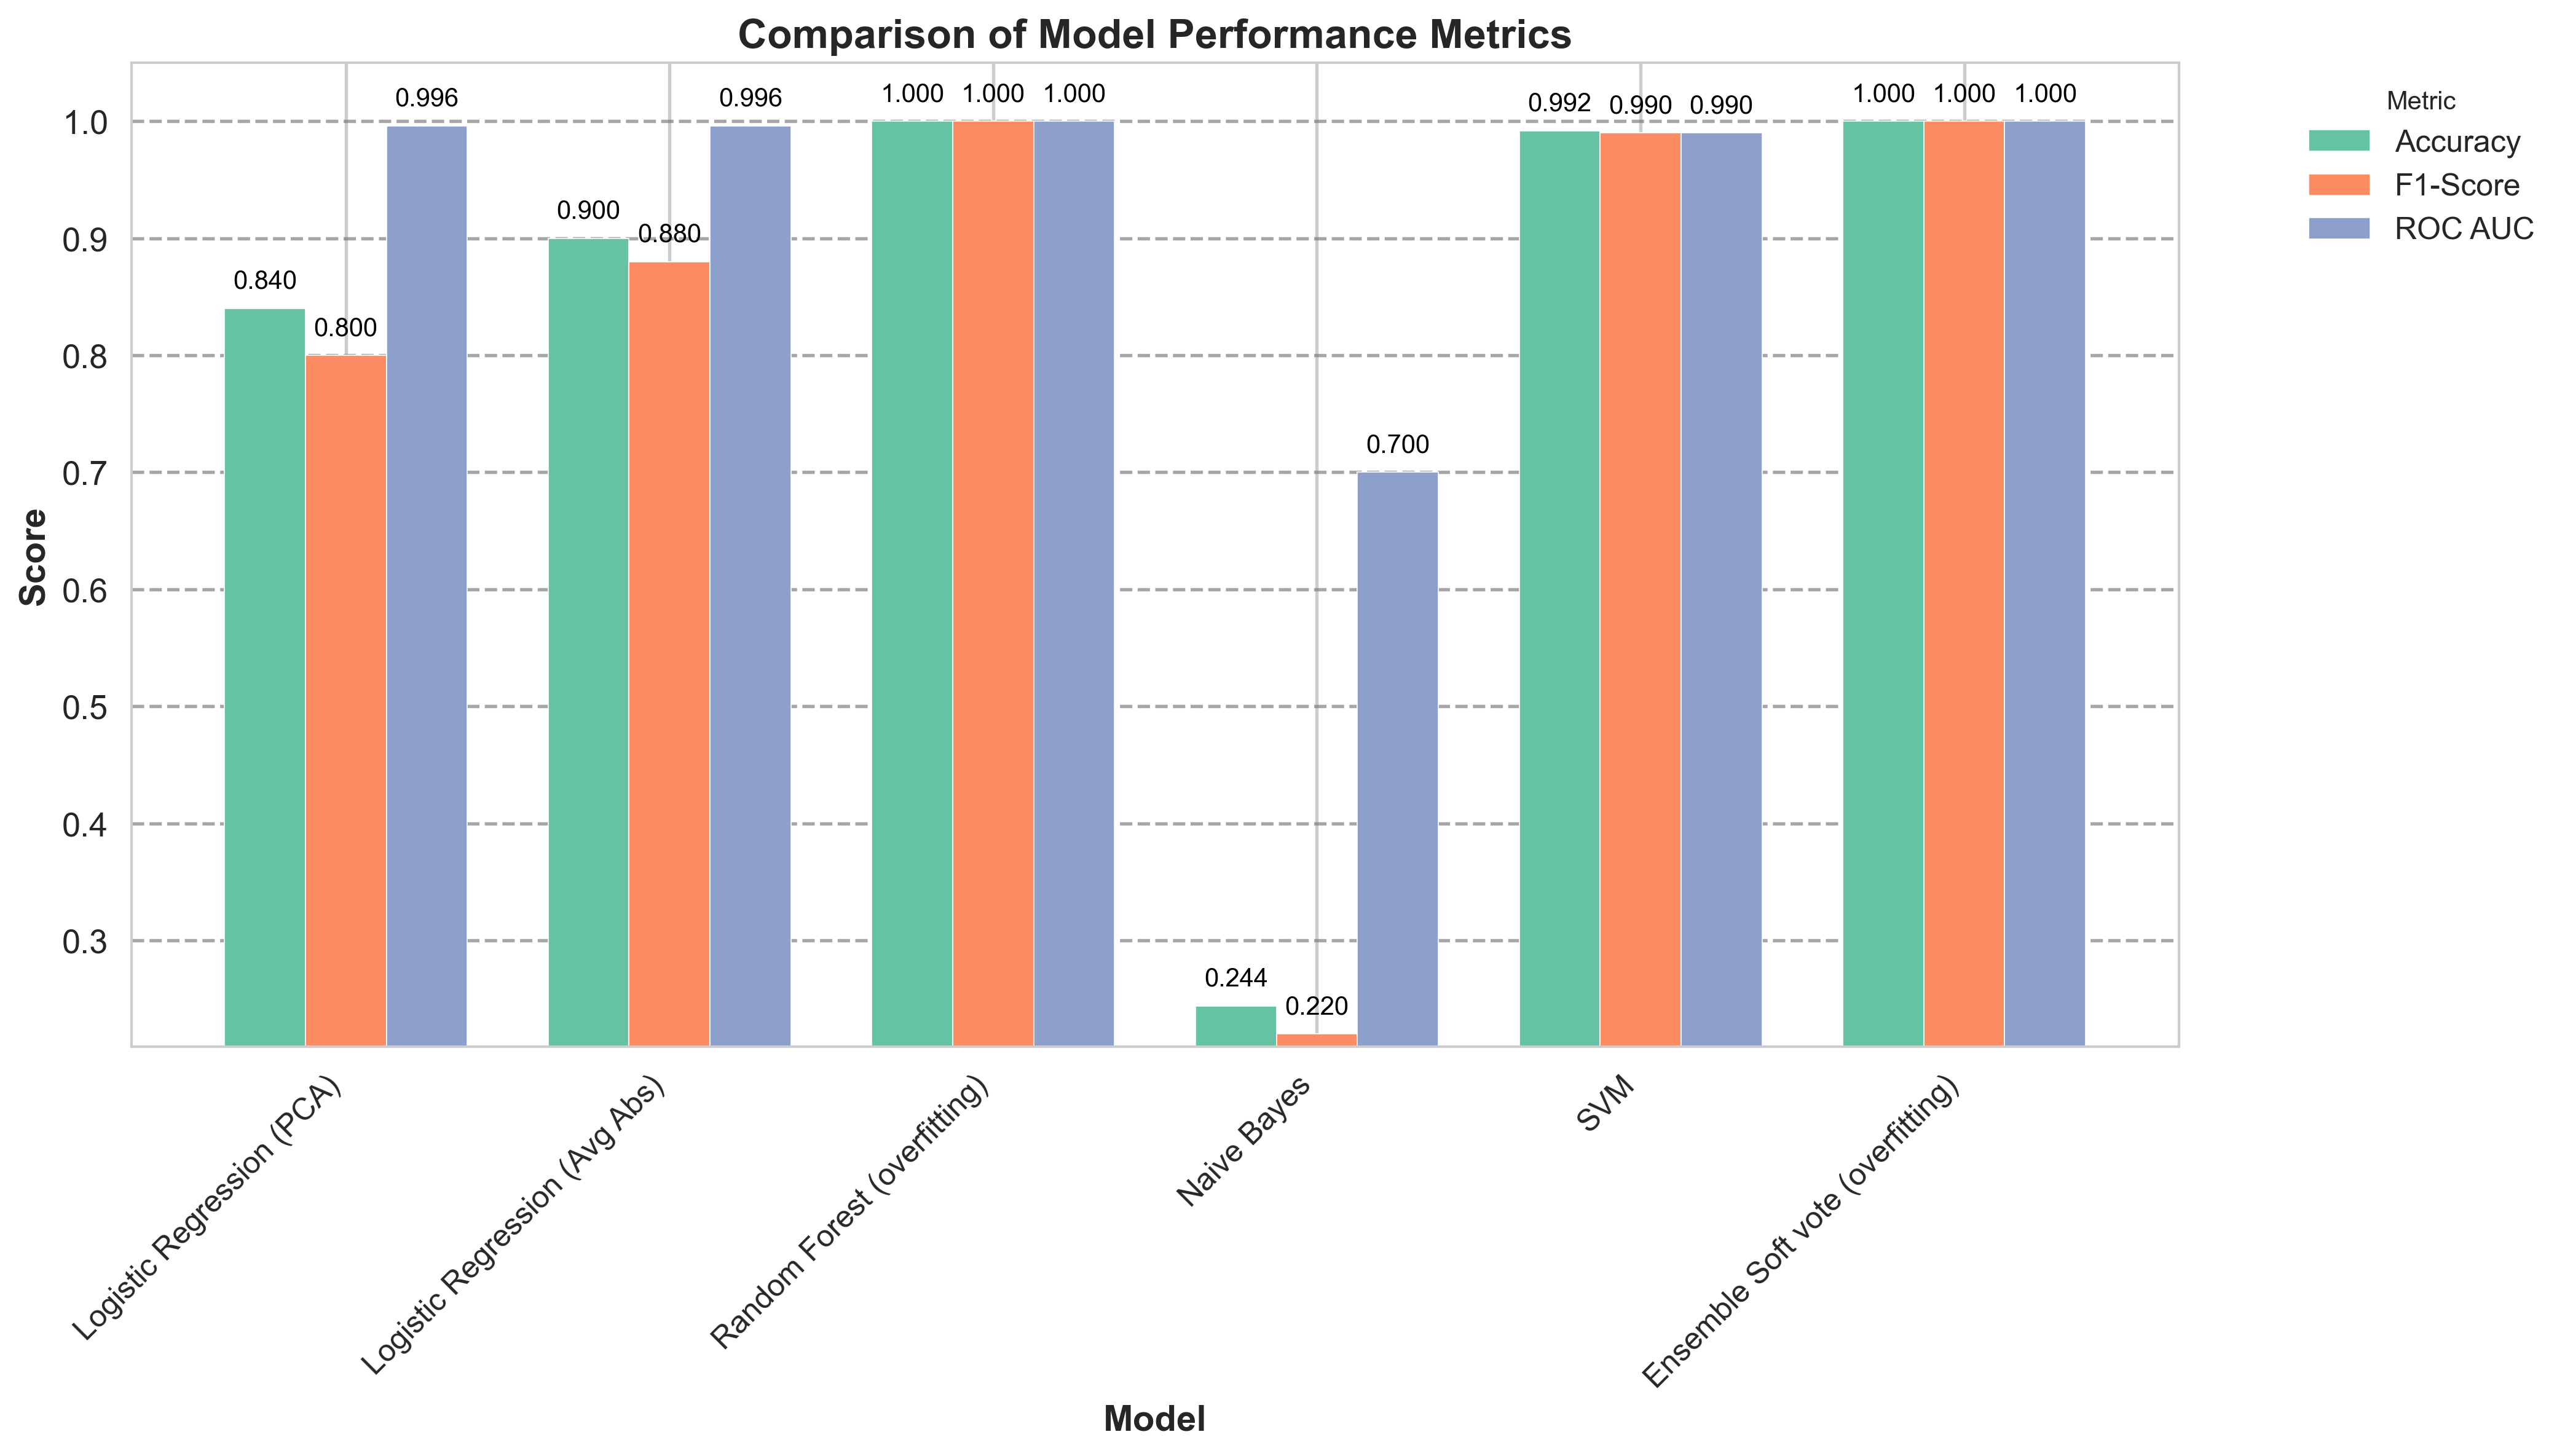

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Plotting Code ---
plt.style.use('seaborn-v0_8-muted')  # Use a muted style for a cleaner look

# Select metrics to plot 
metrics_to_plot = ['Accuracy', 'F1-Score', 'ROC AUC']
n_metrics = len(metrics_to_plot)
n_models = len(df_models['Model'])

bar_width = 0.75 / n_metrics  
index = np.arange(n_models)  

# Set up figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Color palette
colors = sns.color_palette("Set2", n_metrics)

# Create bars for each metric
for i, metric in enumerate(metrics_to_plot):
    # Calculate position for each group of bars
    position = index + (i - n_metrics / 2 + 0.5) * bar_width
    bars = ax.bar(position, df_models[metric], bar_width, label=metric, color=colors[i])
    
    # Optional: Add value labels on top of bars for clarity
    ax.bar_label(bars, fmt='%.3f', padding=6, fontsize=10, color='black')

# --- Customize ---
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Model Performance Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(df_models['Model'], rotation=45, ha='right', fontsize=12)  # Rotate labels for readability

# Add a legend outside the plot
ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Set the y-axis limits to ensure bars fit well and the plot isn't cramped
ax.set_ylim(bottom=min(0.8, df_models[metrics_to_plot].values.min() * 0.95), top=1.05)

# Add gridlines to y-axis only for better visibility
ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.tight_layout()  
plt.show()
# For report: plt.savefig('model_comparison_better_plot.png', dpi=300, bbox_inches='tight')


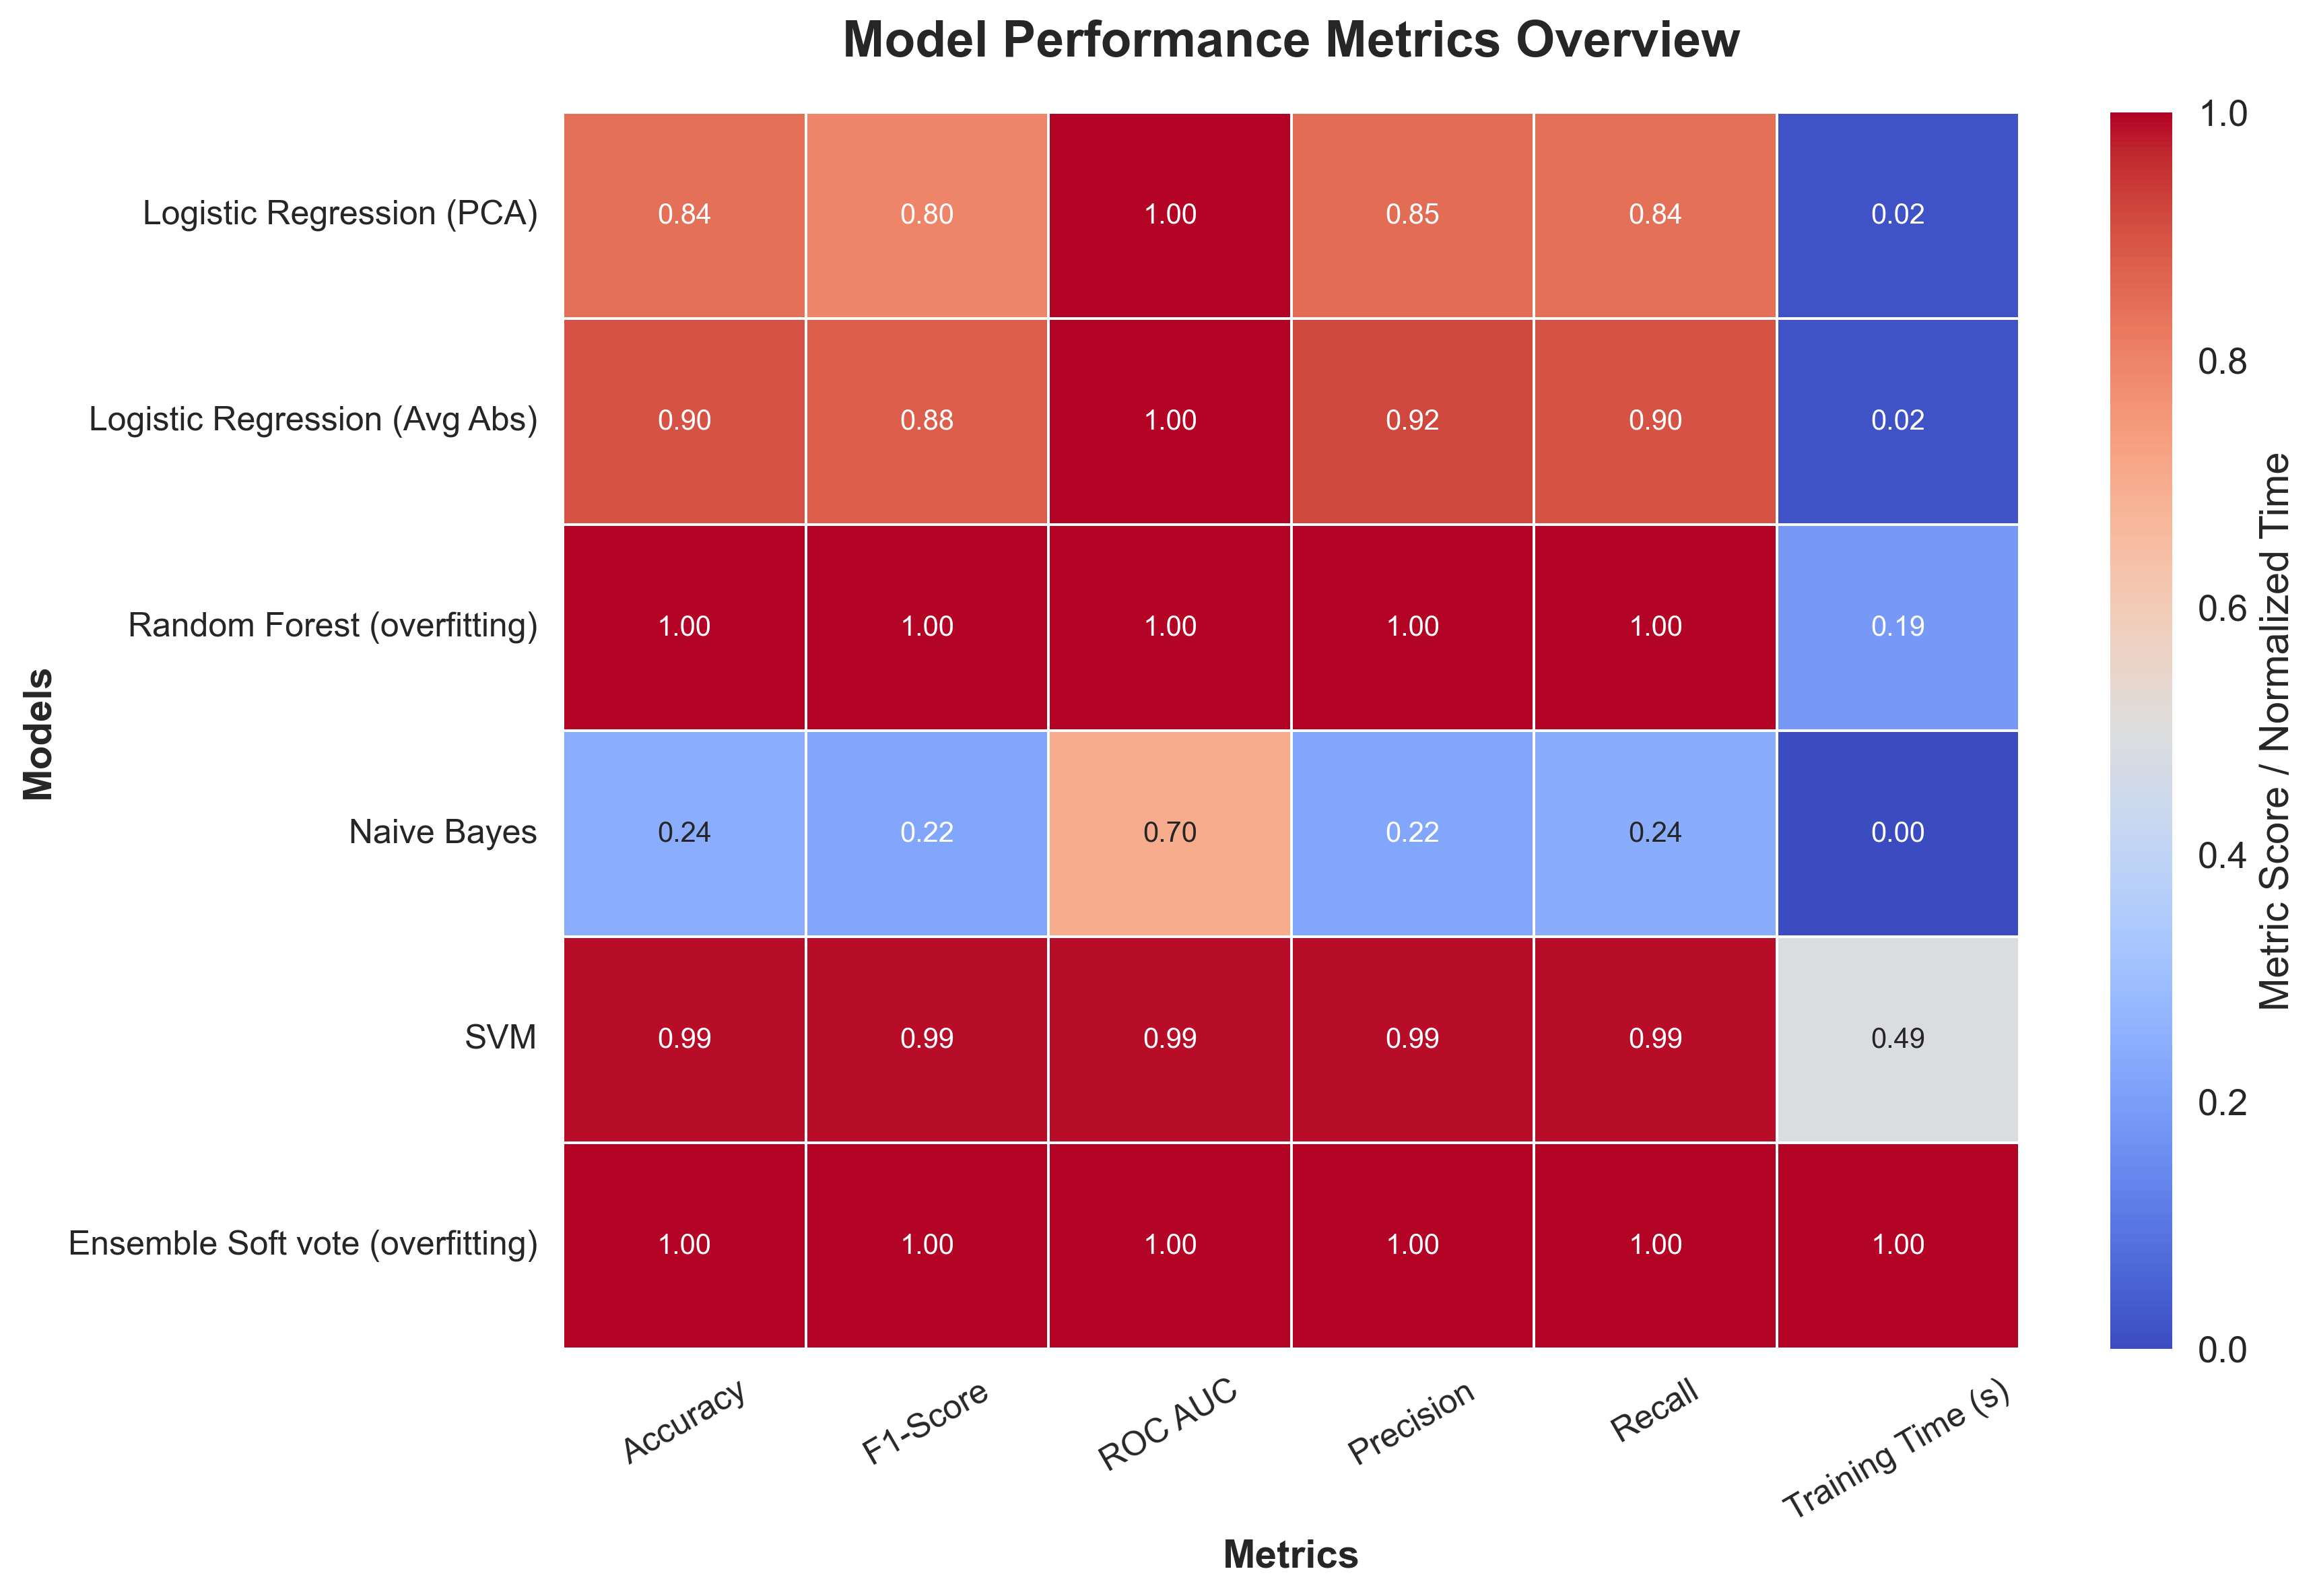

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Plotting Code ---
# Select metrics for the heatmap
metrics_for_heatmap = ['Accuracy', 'F1-Score', 'ROC AUC', 'Precision', 'Recall', 'Training Time (s)']
df_plot = df_models.set_index('Model')[metrics_for_heatmap]

# Normalize Training Time for better color scaling (optional, depending on scale)
df_plot['Training Time (s)'] = (df_plot['Training Time (s)'] - df_plot['Training Time (s)'].min()) / \
                               (df_plot['Training Time (s)'].max() - df_plot['Training Time (s)'].min())

# --- Create Plot ---
plt.style.use('seaborn-v0_8-muted')  # A muted style that works well with heatmaps
fig, ax = plt.subplots(figsize=(12, 8))

# Use a diverging colormap for better contrast in values
sns.heatmap(df_plot, annot=True, fmt=".2f", linewidths=.5, cmap="coolwarm", ax=ax, cbar_kws={'label': 'Metric Score / Normalized Time'})

# --- Customize ---
ax.set_title('Model Performance Metrics Overview', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Models', fontsize=14, fontweight='bold')

# Adjust tick parameters for better readability
ax.tick_params(axis='y', rotation=0, labelsize=12)
ax.tick_params(axis='x', rotation=30, labelsize=12)

# Adjust annotations font size for clarity
for text in ax.texts:
    text.set_fontsize(10)

# Refine gridlines for a more subtle look
ax.grid(False)

# --- Final Layout Adjustments ---
plt.tight_layout()
plt.show()

# For report: plt.savefig('model_comparison_heatmap_improved.png', dpi=300, bbox_inches='tight')


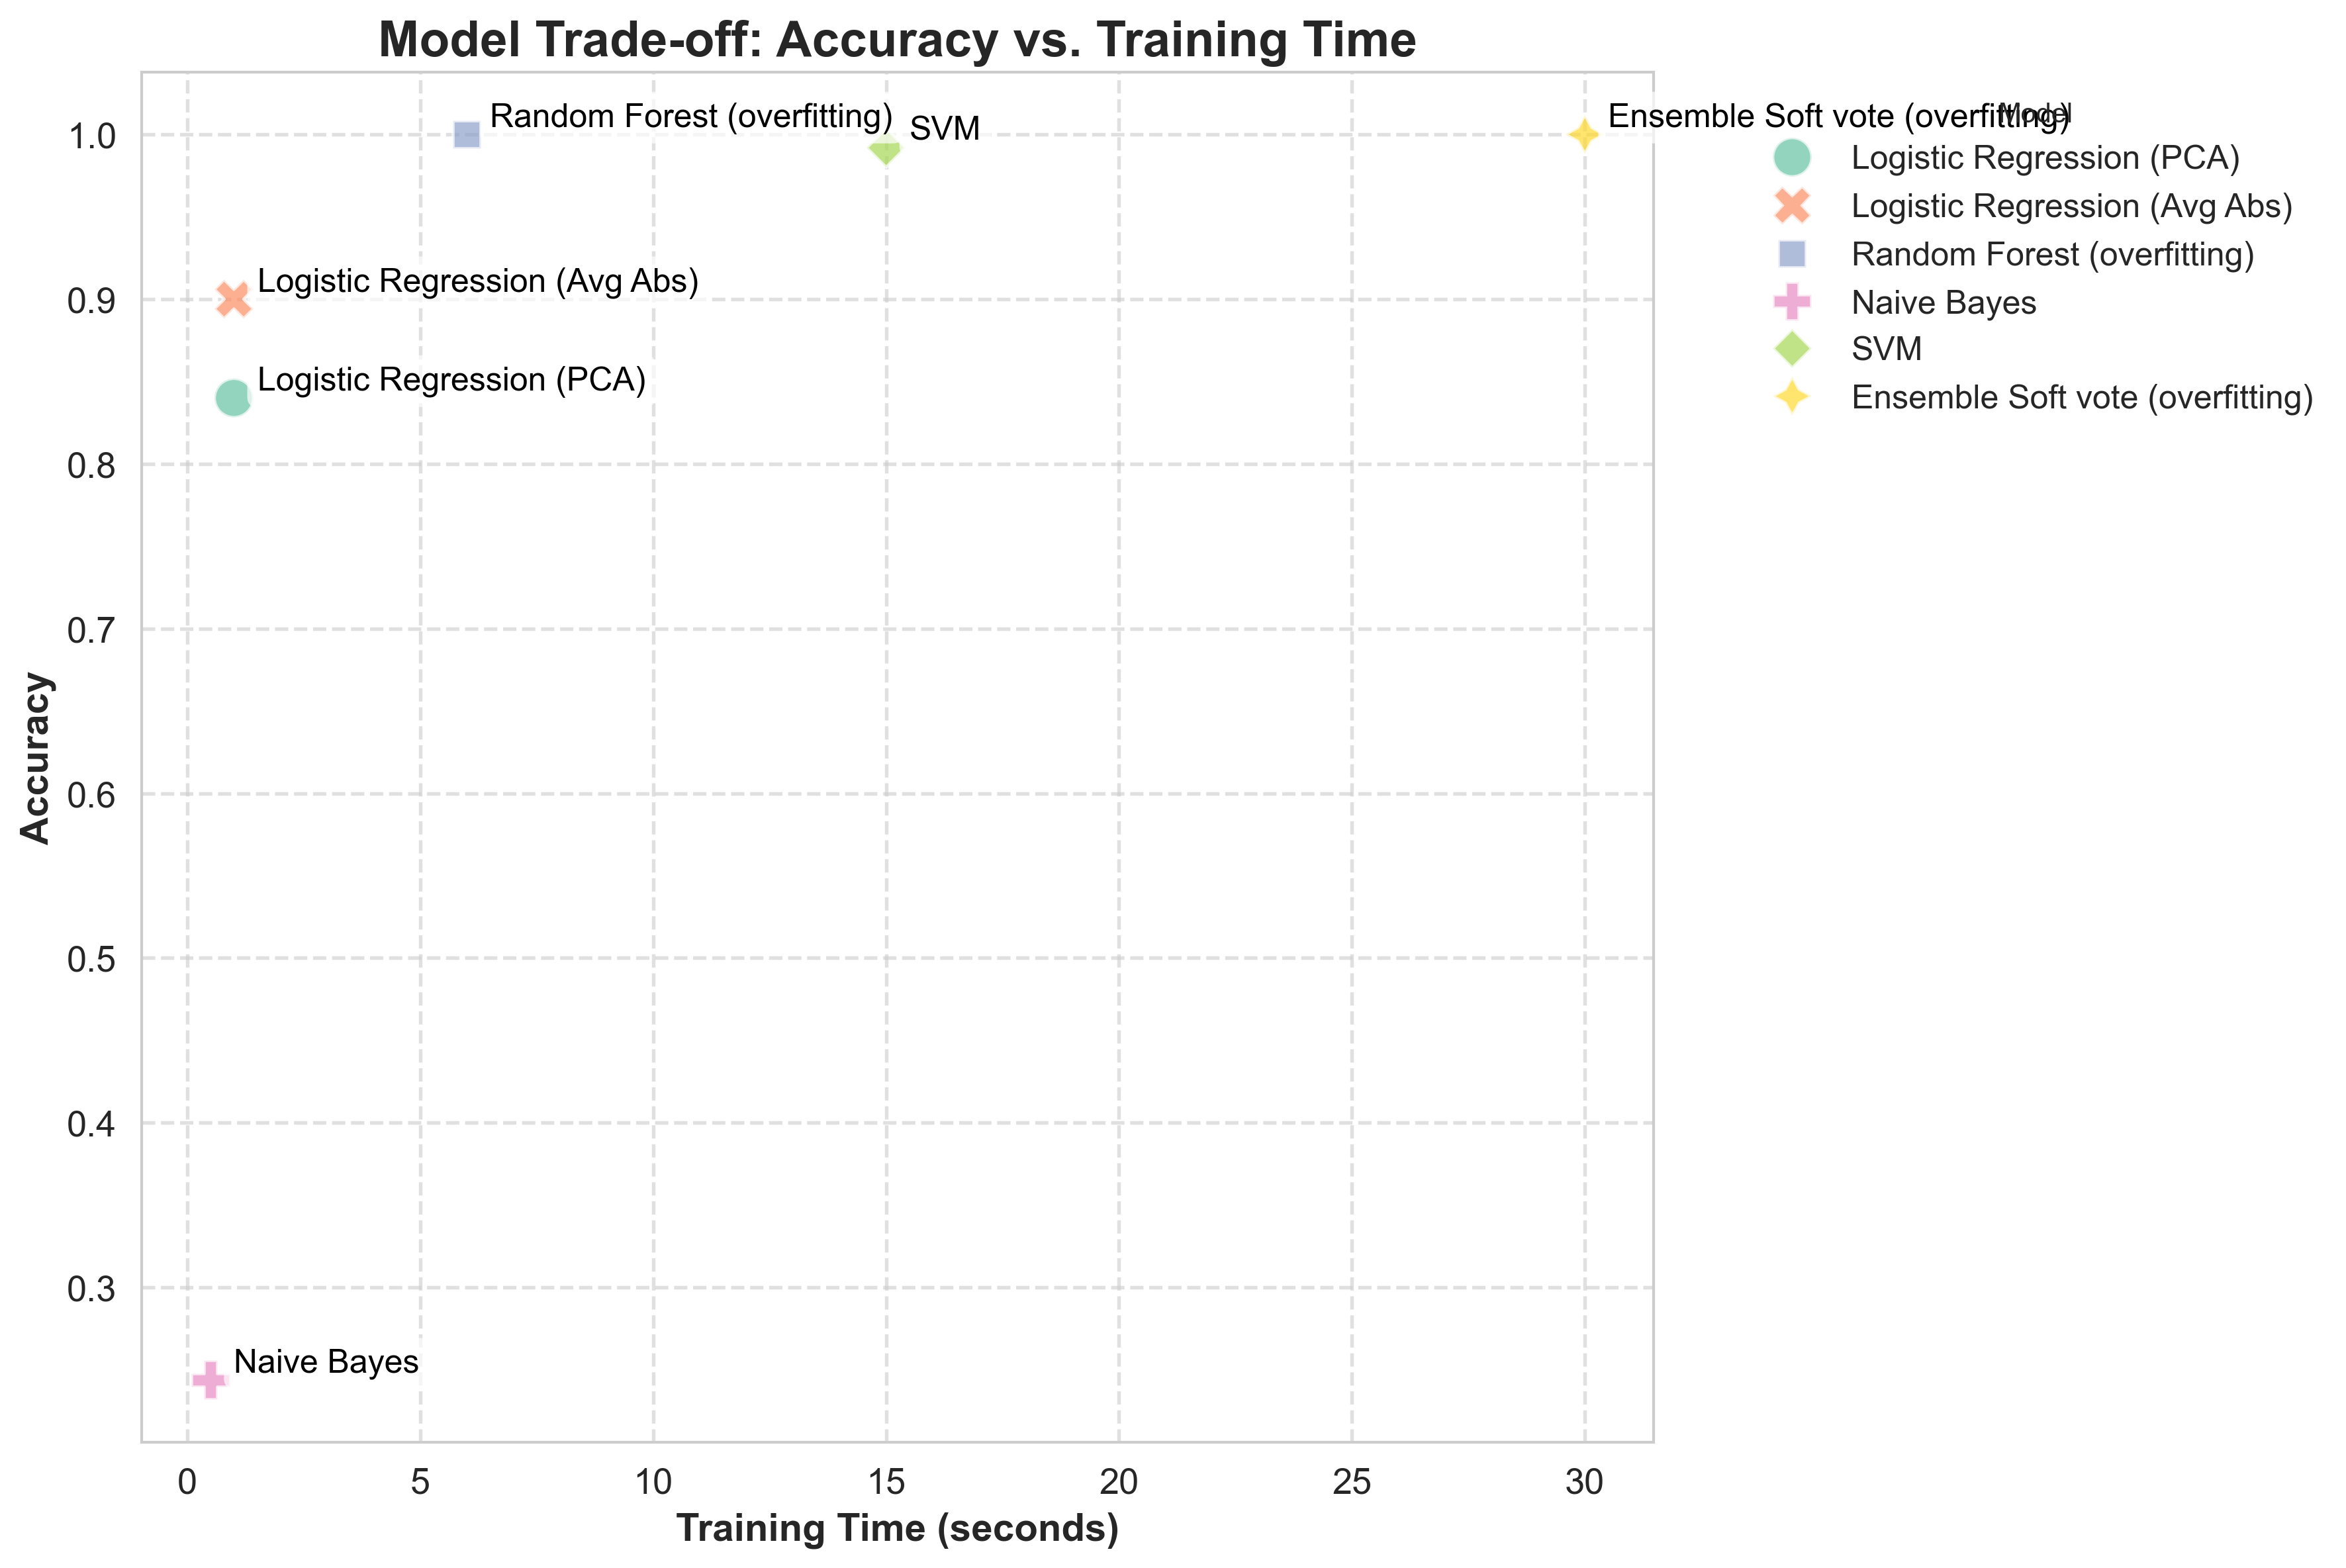

<Figure size 3120x2145 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Plotting Code ---
plt.style.use('seaborn-v0_8-muted')  # Use a more muted style for clarity
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Accuracy vs Training Time with an improved color palette and transparency
sns.scatterplot(x='Training Time (s)', y='Accuracy', data=df_models, 
                hue='Model', s=200, ax=ax, palette='Set2', 
                style='Model', markers=True, legend='full', alpha=0.7)

# --- Customize ---
ax.set_xlabel('Training Time (seconds)', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Model Trade-off: Accuracy vs. Training Time', fontsize=18, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# Add labels next to points for clarity, with adjusted offsets
for i in range(df_models.shape[0]):
    ax.text(x=df_models['Training Time (s)'][i] + 0.5,  # Adjust offset as needed
            y=df_models['Accuracy'][i] + 0.005,  # Adjust offset as needed
            s=df_models['Model'][i],
            fontdict=dict(color='black', size=12),
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))

# Adjust legend position and remove if not needed
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model', fontsize=12)


# Tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

plt.savefig('model_comparison_scatter_improved.png', dpi=300, bbox_inches='tight')
